In [1]:
# start is in NB 12

In [1]:
import colour_scheme as cs
import importlib
importlib.reload(cs)

import scanpy as sc
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=250, format='pdf')
import numpy as np
import pandas as pd
from scipy import io
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
from pathlib import Path
path_fig = ''

import sys
sys.path.append('/links/groups/treutlein/USERS/zhisong_he/Work/brain_organoid_atlas/ext/')
import codes.py_wknn as wknn

sc.settings.figdir = path_fig
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=350, format='.png')

In [3]:
metadata =pd.read_csv(Path(path_data)/"braun_RG_projections.tsv",
                sep='\t')

metadata.index = metadata.CellID
metadata.head()

,Age,CellClass,CellCycleFraction,CellID,Chemistry,Clusters,Donor,DoubletFlag,DoubletScore,Region,...,FGF8_late_D,FGF8_late_A,FGF8_late_E,FGF8_late_B,FGF8_late_C,CycA_E_FGF8_A,Control_SMOG1,presence_max_OSMGT_morphogen,presence_max_OSMGT_ctrl,presence_max_OSMGT_treatment
CellID,,,,,,,,,,,,,,,,,,,,,
10X89_1:AAAGTAGAGACCTTTG,8.0,Radial glia,0.007332,10X89_1:AAAGTAGAGACCTTTG,v2,227.0,BRC2006,0,0.02,Telencephalon,...,0.001884,0.001517,0.001804,0.001684,0.001630,0.000997,0.001596,0.004809,0.004800,0.004809
10X89_1:AACCATGGTCACTTCC,8.0,Radial glia,0.004778,10X89_1:AACCATGGTCACTTCC,v2,227.0,BRC2006,0,0.01,Telencephalon,...,0.001730,0.001735,0.002324,0.001885,0.001969,0.001160,0.001791,0.010487,0.004772,0.010487
10X89_1:AAGACCTGTGCGGTAA,8.0,Radial glia,0.007248,10X89_1:AAGACCTGTGCGGTAA,v2,227.0,BRC2006,0,0.03,Telencephalon,...,0.001205,0.001162,0.001325,0.001274,0.001161,0.000723,0.001182,0.003607,0.003607,0.003511
10X89_1:ACACCAAAGATGCCTT,8.0,Radial glia,0.003004,10X89_1:ACACCAAAGATGCCTT,v2,227.0,BRC2006,0,0.02,Telencephalon,...,0.002162,0.002267,0.002506,0.002664,0.002189,0.001707,0.002554,0.008725,0.006418,0.008725
10X89_1:ACACTGACATCAGTAC,8.0,Radial glia,0.005533,10X89_1:ACACTGACATCAGTAC,v2,227.0,BRC2006,0,0.07,Telencephalon,...,0.001770,0.001834,0.002804,0.001929,0.002189,0.001347,0.001882,0.013402,0.004517,0.013402


In [4]:
braun = sc.read_h5ad(Path(path_data)/'braun_2022_fetal_brain_v2_RG_subset.h5ad')
umap = pd.read_csv(Path(path_data)/"braun_RG_umap.tsv", sep='\t')
braun.obsm['X_umap_RG'] = umap.values
braun

AnnData object with n_obs × n_vars = 518030 × 33538
    obs: 'Age', 'CellClass', 'CellCycleFraction', 'CellID', 'Chemistry', 'Clusters', 'Donor', 'DoubletFlag', 'DoubletScore', 'Region', 'SampleID', 'Sex', 'Subdivision', 'Subregion', 'Tissue', 'TopLevelCluster', 'TotalUMIs', 'log_num_wknn_scanvi_q2r', 'cov_score', 'log_num_wknn_scanvi_q2r_ds_max', 'observed', 'leiden_scvi_res_1', 'leiden_scvi_res_2', 'leiden_scvi_res_10', 'log_num_wknn_rss_q2r_ds_max', 'observed_rss', 'leiden_rss_res_1', 'leiden_rss_res_2', 'leiden_rss_res_10', 'coex_score', 'matching_score', 'log_num_wknn_scanvi_q2r_hb', 'log_num_wknn_scanvi_q2r_hb_ds_max', 'Subregion2', 'neuron_ntt_label', 'gaus_scanvi_q2r', 'dist_scanvi_q2r', 'gaus_scanvi_q2r_sm', 'gaus_scanvi_q2r_ds_max', 'neuron_ntt_label_only'
    var: 'Accession', 'Chromosome', 'End', 'Gene', 'Start', 'Strand'
    uns: 'Donor_colors', 'Subregion_colors', 'leiden', 'leiden_rss_res_1_colors', 'leiden_rss_res_2_colors', 'log1p', 'matching_score_colors', 'neighbors'

In [5]:
braun.obs = metadata

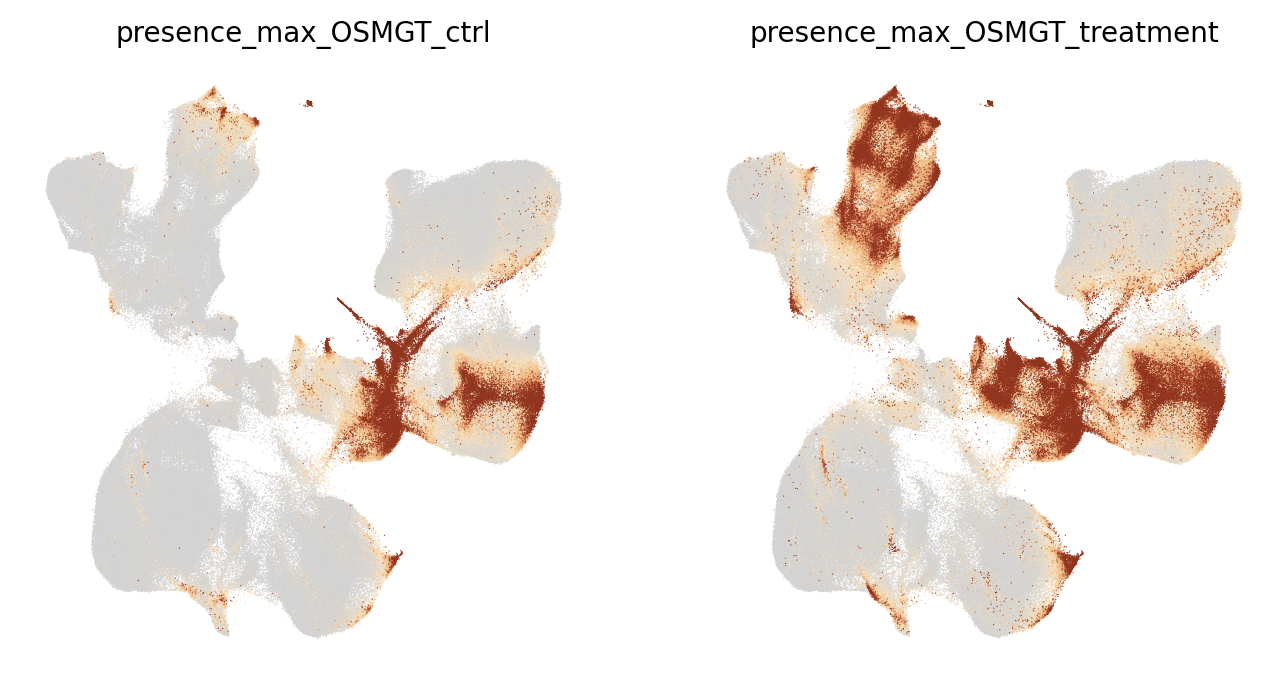

In [13]:
import matplotlib.colors as mcolors
colors = ["#D3D3D3", 
    
    "#fbe3c2", "#f2c88f", "#ecb27d", "#e69c6b", "#d37750", "#b9563f", "#92351e"]

cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap_with_gray", colors)




fig, ax = plt.subplots(1,2,figsize=(8,4))
sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_OSMGT_ctrl'], frameon=False, color_map=cmap, ax=ax[0], 
                show=False, size=0.8,colorbar_loc=None)  # Disable legend)
sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_OSMGT_treatment'], frameon=False, color_map=cmap, ax=ax[1], show=False,
                size=0.8,colorbar_loc=None)  # Disable legend)
plt.savefig(path_fig+'OSMGT_presence_score_v2.png', dpi=300, format='png', bbox_inches='tight')
fig.show()


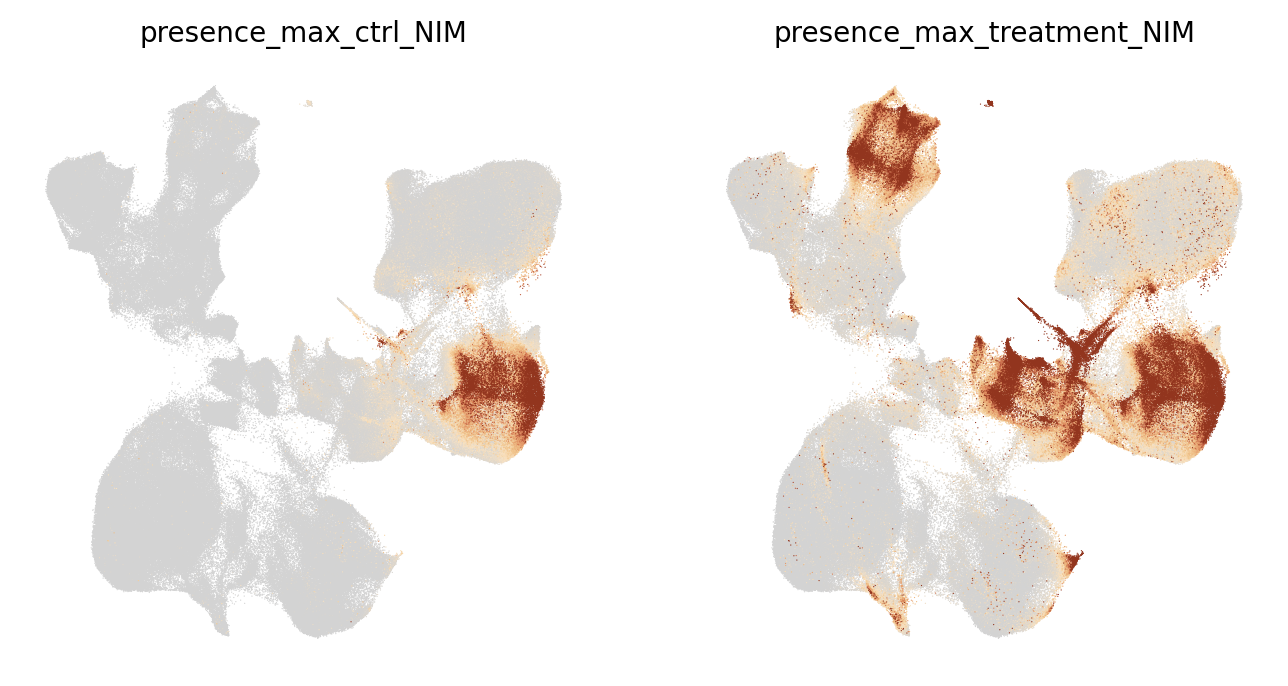

In [14]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_ctrl_NIM'], frameon=False, color_map=cmap, ax=ax[0], 
                show=False, size=0.8,colorbar_loc=None)  # Disable legend)
sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_treatment_NIM'], frameon=False, color_map=cmap, ax=ax[1], show=False,
                size=0.8,colorbar_loc=None)  # Disable legend)
plt.savefig(path_fig+'NIM_presence_score_v2.png', dpi=300, format='png', bbox_inches='tight')
fig.show()

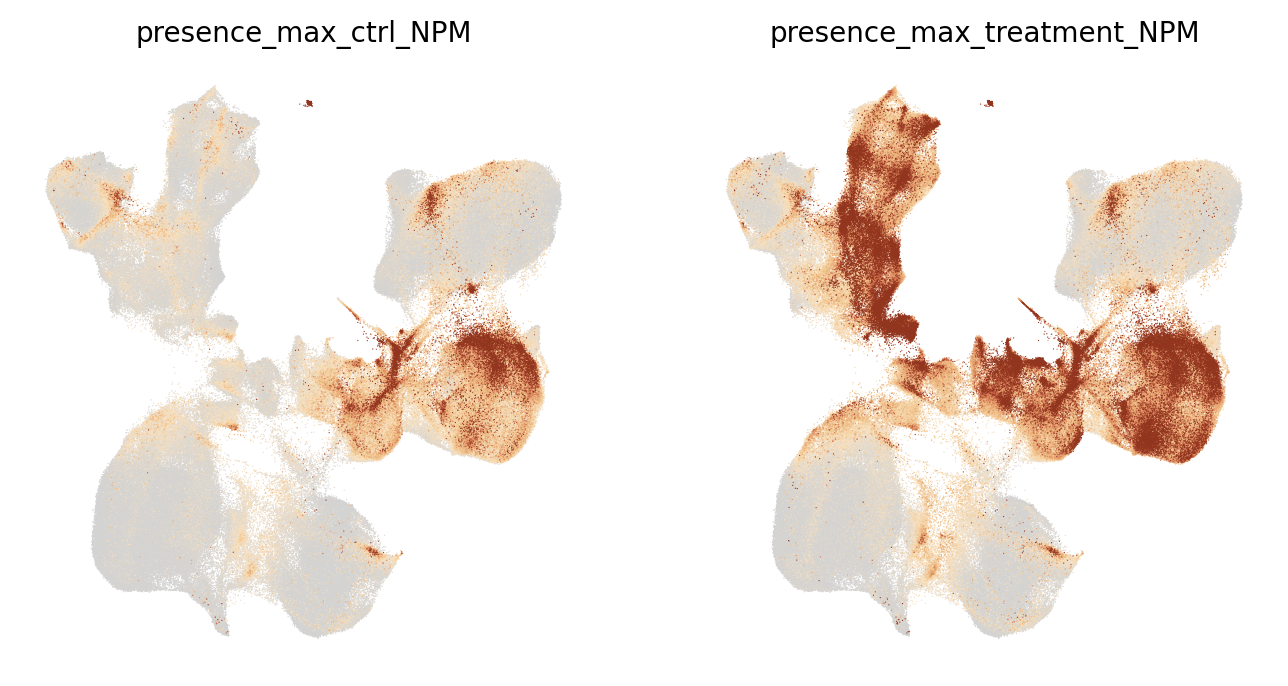

In [16]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_ctrl_NPM'], frameon=False, color_map=cmap, ax=ax[0], 
                show=False, size=0.8,colorbar_loc=None)  # Disable legend)
sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_treatment_NPM'], frameon=False, color_map=cmap, ax=ax[1], show=False,
                size=0.8,colorbar_loc=None)  # Disable legend)
plt.savefig(path_fig+'NPM_presence_score_v2.png', dpi=300, format='png', bbox_inches='tight')
fig.show()

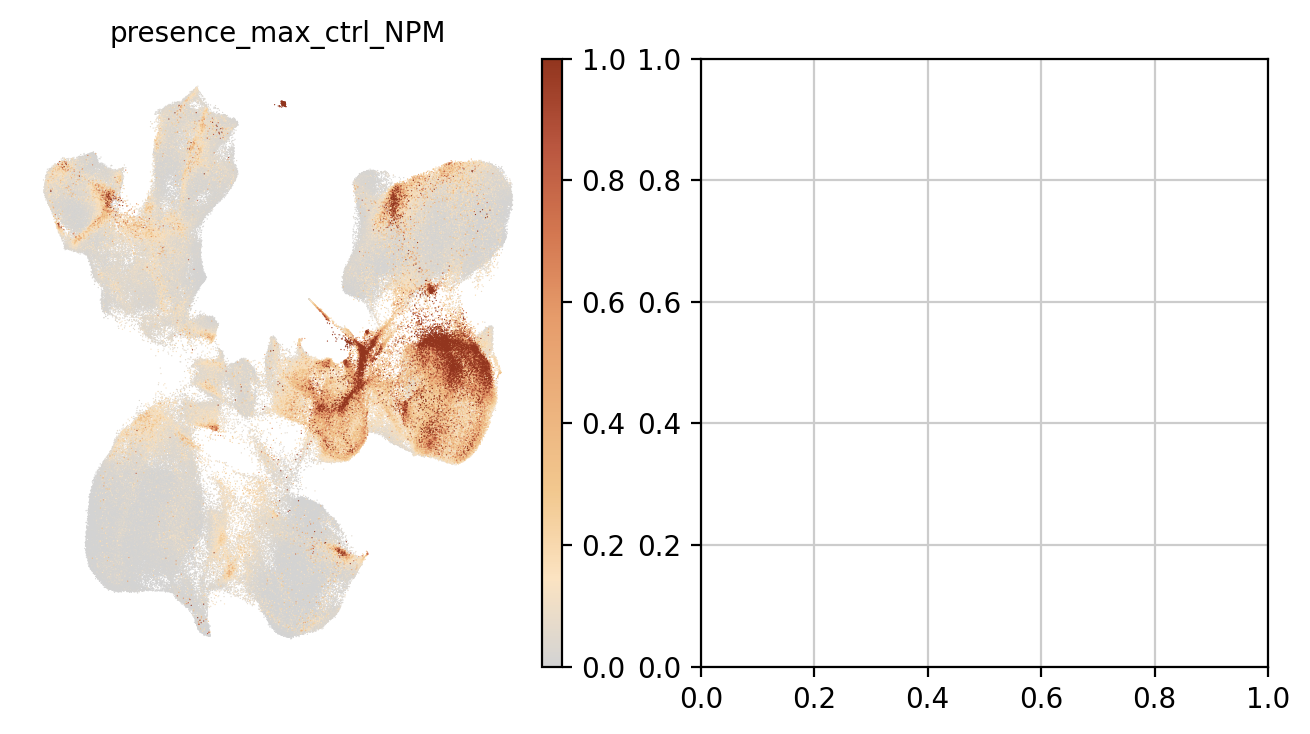

In [19]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_ctrl_NPM'], frameon=False, color_map=cmap, ax=ax[0], 
                show=False, size=0.8)  # Disable legend)
#sc.pl.embedding(braun, basis='X_umap_RG', color=['presence_max_treatment_NPM'], frameon=False, color_map=cmap, ax=ax[1], show=False,
#                size=0.8,colorbar_loc=None)  # Disable legend)
plt.savefig(path_fig+'NPM_presence_score_v2_legend.pdf', dpi=300, format='pdf', bbox_inches='tight')
fig.show()